ЛР2 Случайные величины. Нормальный закон распределения. Моменты и критические границы случайной величины

https://rosstat.gov.ru/storage/mediabank/urov_11subg_nm.xlsx УРОВЕНЬ ДЕНЕЖНЫХ ДОХОДОВ НАСЕЛЕНИЯ В ЦЕЛОМ ПО РОССИИ И ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2022 ГОД

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_excel('/content/drive/My Drive/dohod.xlsx')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Регион,Доходы
0,Белгородская область,41855
1,Брянская область,37428
2,Владимирская область,34667
3,Воронежская область,41156
4,Ивановская область,36509
...,...,...
82,Амурская область,49798
83,Магаданская область,101999
84,Сахалинская область,79322
85,Еврейская автономная область,37753


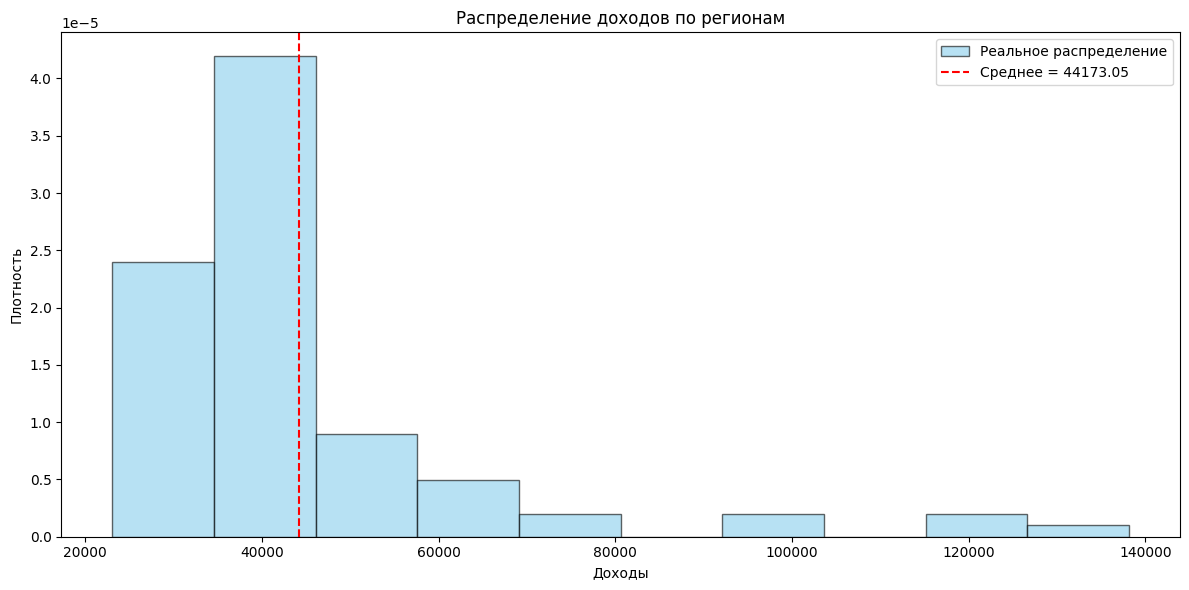

In [9]:
values = data['Доходы']
mean_value = np.mean(values)
std_value = np.std(values)
plt.figure(figsize=(12, 6))
plt.hist(values, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Реальное распределение')
plt.title('Распределение доходов по регионам')
plt.xlabel('Доходы')
plt.ylabel('Плотность')
plt.axvline(mean_value, color='r', linestyle='--', label=f'Среднее = {mean_value:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import kurtosis, skew
mean_value = np.mean(values)  #Математическое ожидание
variance_value = np.var(values)  #Дисперсия
skewness_value = skew(values)  #Асимметрия
kurtosis_value = kurtosis(values)  #Эксцесс
quantile_05 = np.quantile(values, 0.05)  #Квантиль уровня 0.05
quantile_95 = np.quantile(values, 0.95)  #Квантиль уровня 0.95
quantile_25 = np.percentile(values, 2.5)  #2.5%-ная точка
print(f"Математическое ожидание: {mean_value:.2f}")
print(f"Дисперсия: {variance_value:.2f}")
print(f"Асимметрия: {skewness_value:.2f}")
print(f"Эксцесс: {kurtosis_value:.2f}")
print(f"Квантиль уровня 0.05: {quantile_05:.2f}")
print(f"Квантиль уровня 0.95: {quantile_95:.2f}")
print(f"2.5%-ная точка: {quantile_25:.2f}")


Математическое ожидание: 44173.05
Дисперсия: 436955903.35
Асимметрия: 2.57
Эксцесс: 6.89
Квантиль уровня 0.05: 27324.90
Квантиль уровня 0.95: 95195.90
2.5%-ная точка: 23874.35


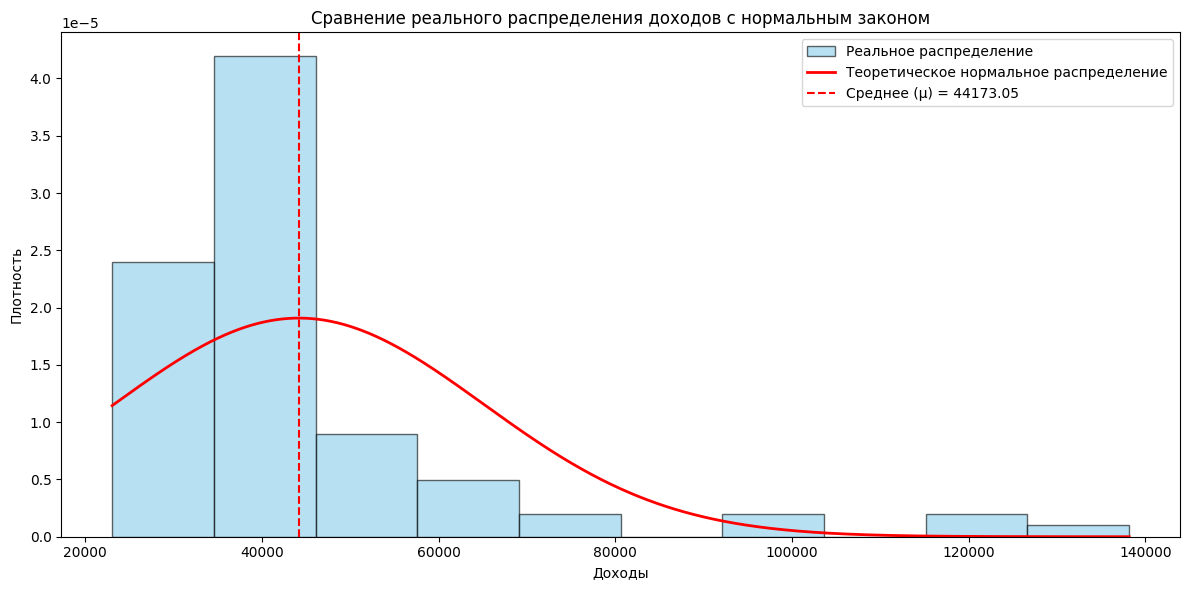

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(values, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Реальное распределение')
x = np.linspace(min(values), max(values), 1000)
y = norm.pdf(x, mean_value, np.sqrt(variance_value))
plt.plot(x, y, 'r-', lw=2, label='Теоретическое нормальное распределение')
plt.title('Сравнение реального распределения доходов с нормальным законом')
plt.xlabel('Доходы')
plt.ylabel('Плотность')
plt.axvline(mean_value, color='r', linestyle='--', label=f'Среднее (μ) = {mean_value:.2f}')
plt.legend()
plt.tight_layout()
plt.show()


# **Вывод**

**Распределение доходов:**
Реальное распределение доходов отличается от идеального нормального распределения. Гистограмма показывает асимметрию: большинство доходов сосредоточено в диапазоне 30-50 тысяч рублей. И поэтому наблюдаем положительную асимметрию (смещение вправо)

**Среднее значение:**
Не точно совпадает с модой

**Сравнение с нормальным распределением:**
Линия теоретического нормального распределения немного отклоняется от реального.
У теоретического нормального распределения хвосты менее длинные чем у реального, это говорит нам о присутствии регионов которые отличаюся от среднего (аномалии или редкие события)

**Из графика четко видно дифференциацию доходов в разных субьектах РФ**